In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras import models

from tensorflow.keras import layers
from sklearn.preprocessing import MinMaxScaler
print(tf.__version__)

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2
2.6.0-dev20210328


C:\ProgramData\Anaconda3\envs\tf2\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


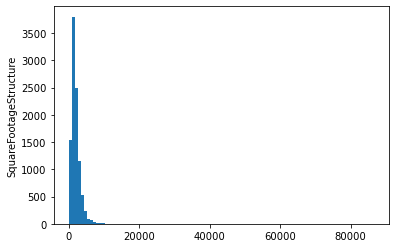

In [2]:
data = pd.read_excel("resd_data.xlsx",engine='openpyxl')
data = data.drop(columns='field_PostalCode')
data.fillna(0, inplace=True)
plt.hist(data.SquareFootageStructure, bins = 100)
plt.ylabel('SquareFootageStructure');

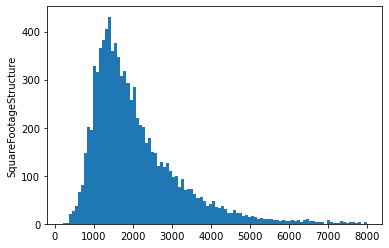

In [3]:
data = data.drop(data[(data.SquareFootageStructure > 8000) | (data.SquareFootageStructure < 100)].index)
plt.hist(data.SquareFootageStructure, bins = 100)
plt.ylabel('SquareFootageStructure');

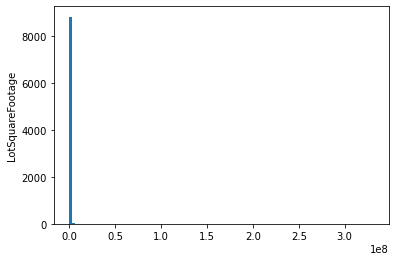

In [4]:
plt.hist(data.LotSquareFootage, bins = 100)
plt.ylabel('LotSquareFootage');

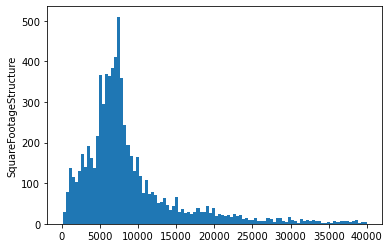

In [5]:
data = data.drop(data[(data.LotSquareFootage > 40000) | (data.LotSquareFootage < 100)].index)
plt.hist(data.LotSquareFootage, bins = 100)
plt.ylabel('SquareFootageStructure');

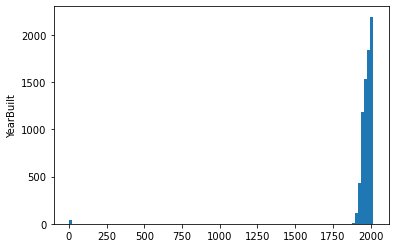

In [6]:
plt.hist(data.YearBuilt, bins = 100)
plt.ylabel('YearBuilt');

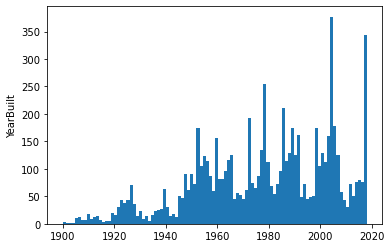

In [7]:
data = data.drop(data[(data.YearBuilt < 1900)].index)
plt.hist(data.YearBuilt, bins = 100)
plt.ylabel('YearBuilt');

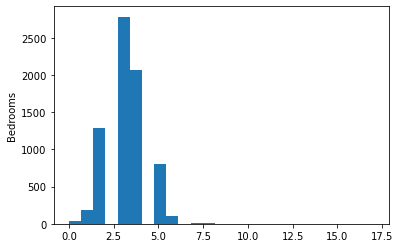

In [8]:
plt.hist(data.Bedrooms, bins = 25)
plt.ylabel('Bedrooms');

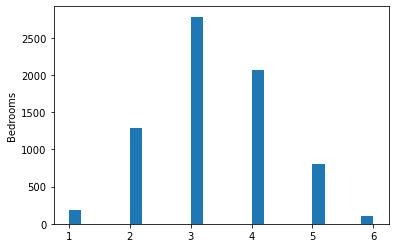

In [9]:
data = data.drop(data[(data.Bedrooms > 6) | (data.Bedrooms < 1)].index)
plt.hist(data.Bedrooms, bins = 25)
plt.ylabel('Bedrooms');

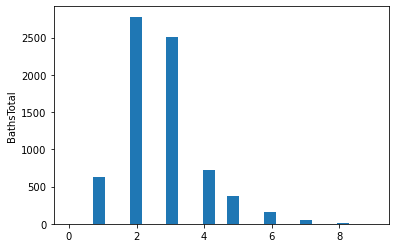

In [10]:
plt.hist(data.BathsTotal, bins = 25)
plt.ylabel('BathsTotal');

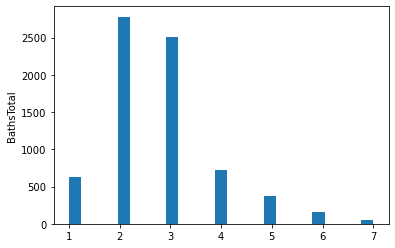

In [11]:
data = data.drop(data[(data.BathsTotal < 1) | (data.BathsTotal > 7)].index)
plt.hist(data.BathsTotal, bins = 25)
plt.ylabel('BathsTotal');

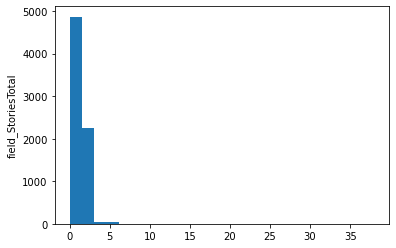

In [12]:
plt.hist(data.field_StoriesTotal, bins = 25)
plt.ylabel('field_StoriesTotal');

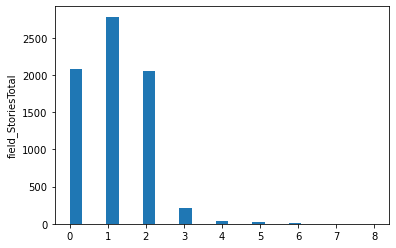

In [13]:
data = data.drop(data[(data.field_StoriesTotal > 8)].index)
plt.hist(data.field_StoriesTotal, bins = 25)
plt.ylabel('field_StoriesTotal');

In [14]:
data = data.to_numpy()
data.shape

(7209, 7)

In [15]:
split = int(0.8*data.shape[0])
train_data, train_targets = data[:split, 0:-1], data[:split, -1]
test_data, test_targets = data[split:, 0:-1], data[split:, -1]

In [16]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

In [17]:
def build_model():
    
    model = keras.Sequential([
        layers.Dense(train_data.shape[1], input_shape=(train_data.shape[1],), activation='relu'),
        layers.Dense(5, activation = 'relu'),
        layers.Dense(3, activation = 'relu'),
        layers.Dense(1)
    ])
    model.compile(optimizer=keras.optimizers.RMSprop(0.003), loss='mse', metrics=['mae'])
    #keras.optimizers.RMSprop(0.1)
    return model

In [18]:
k=3
num_val_samples = len(train_data) // k
num_epochs = 300
all_mae_histories = []
all_mae_val_histories = []
all_loss_histories = []
all_loss_val_histories = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([train_data[:i * num_val_samples],train_data[(i + 1) * num_val_samples:]],axis=0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples],train_targets[(i + 1) * num_val_samples:]],axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,validation_data=(val_data, val_targets),epochs=num_epochs, batch_size=16)
    
    all_mae_histories.append(history.history['mae'])
    all_mae_val_histories.append(history.history['val_mae'])
    all_loss_histories.append(history.history['loss'])
    all_loss_val_histories.append(history.history['val_loss'])

processing fold # 0
Epoch 1/300
241/241 [==============================] - 2s 5ms/step - loss: 1483402863201.3223 - mae: 754002.4910 - val_loss: 1807565455360.0000 - val_mae: 775903.8125
Epoch 2/300
241/241 [==============================] - 1s 5ms/step - loss: 1510224280652.1653 - mae: 747846.6134 - val_loss: 1805974765568.0000 - val_mae: 775380.6875
Epoch 3/300
241/241 [==============================] - 1s 5ms/step - loss: 1603864625964.4297 - mae: 750159.7643 - val_loss: 1800538554368.0000 - val_mae: 773676.8750
Epoch 4/300
241/241 [==============================] - 1s 5ms/step - loss: 1554001265452.4297 - mae: 753972.1914 - val_loss: 1787825618944.0000 - val_mae: 770171.8750
Epoch 5/300
241/241 [==============================] - 1s 5ms/step - loss: 1688345016472.3306 - mae: 752821.9024 - val_loss: 1763403497472.0000 - val_mae: 763896.4375
Epoch 6/300
241/241 [==============================] - 1s 5ms/step - loss: 1653319944716.6943 - mae: 762998.3301 - val_loss: 1720706138112.0000 -

241/241 [==============================] - 1s 5ms/step - loss: 699069838699.9009 - mae: 453178.4323 - val_loss: 760249057280.0000 - val_mae: 459337.4375
Epoch 51/300
241/241 [==============================] - 1s 5ms/step - loss: 870203937241.9174 - mae: 455954.4479 - val_loss: 760493506560.0000 - val_mae: 457430.0312
Epoch 52/300
241/241 [==============================] - 1s 5ms/step - loss: 698143866812.2975 - mae: 437491.7221 - val_loss: 759738728448.0000 - val_mae: 456851.2812
Epoch 53/300
241/241 [==============================] - 1s 5ms/step - loss: 604061493163.3719 - mae: 432117.2676 - val_loss: 756669546496.0000 - val_mae: 458133.7188
Epoch 54/300
241/241 [==============================] - 1s 5ms/step - loss: 615543884029.8843 - mae: 440070.6901 - val_loss: 757155692544.0000 - val_mae: 456500.6875
Epoch 55/300
241/241 [==============================] - 1s 5ms/step - loss: 751797535803.2396 - mae: 451664.1012 - val_loss: 757875933184.0000 - val_mae: 455161.1250
Epoch 56/300
241/

241/241 [==============================] - 1s 5ms/step - loss: 636580580800.5289 - mae: 439042.0021 - val_loss: 738157133824.0000 - val_mae: 450291.1875
Epoch 100/300
241/241 [==============================] - 1s 5ms/step - loss: 608801981228.4298 - mae: 435825.3589 - val_loss: 737591820288.0000 - val_mae: 450425.3125
Epoch 101/300
241/241 [==============================] - 1s 5ms/step - loss: 651052698056.9917 - mae: 432026.6909 - val_loss: 737496793088.0000 - val_mae: 450185.2812
Epoch 102/300
241/241 [==============================] - 1s 5ms/step - loss: 879655209755.5042 - mae: 462708.9374 - val_loss: 739268689920.0000 - val_mae: 449131.5625
Epoch 103/300
241/241 [==============================] - 1s 5ms/step - loss: 677484126275.7025 - mae: 437553.4873 - val_loss: 737334394880.0000 - val_mae: 449882.5000
Epoch 104/300
241/241 [==============================] - 1s 5ms/step - loss: 623328213110.4794 - mae: 417779.8297 - val_loss: 737647067136.0000 - val_mae: 449505.5000
Epoch 105/30

241/241 [==============================] - 1s 5ms/step - loss: 691027160309.4215 - mae: 435309.5050 - val_loss: 729004769280.0000 - val_mae: 442767.6875
Epoch 149/300
241/241 [==============================] - 1s 5ms/step - loss: 815121375435.1074 - mae: 439029.0143 - val_loss: 728620793856.0000 - val_mae: 442643.1562
Epoch 150/300
241/241 [==============================] - 1s 5ms/step - loss: 709967302892.9586 - mae: 422125.1161 - val_loss: 728447713280.0000 - val_mae: 442504.5000
Epoch 151/300
241/241 [==============================] - 1s 5ms/step - loss: 724045402078.1488 - mae: 440118.3079 - val_loss: 727615143936.0000 - val_mae: 442624.6875
Epoch 152/300
241/241 [==============================] - 1s 5ms/step - loss: 626300411430.0826 - mae: 422689.9804 - val_loss: 726799482880.0000 - val_mae: 442635.6562
Epoch 153/300
241/241 [==============================] - 1s 5ms/step - loss: 588952899550.1488 - mae: 420739.5931 - val_loss: 725550497792.0000 - val_mae: 443018.1875
Epoch 154/30

241/241 [==============================] - 1s 5ms/step - loss: 705276218139.5042 - mae: 425336.5025 - val_loss: 719501131776.0000 - val_mae: 436909.7188
Epoch 198/300
241/241 [==============================] - 1s 5ms/step - loss: 615290203787.6364 - mae: 400717.4174 - val_loss: 719282831360.0000 - val_mae: 436823.7812
Epoch 199/300
241/241 [==============================] - 1s 5ms/step - loss: 807810343927.5372 - mae: 433239.9622 - val_loss: 719438610432.0000 - val_mae: 436554.1250
Epoch 200/300
241/241 [==============================] - 1s 5ms/step - loss: 611385405338.4463 - mae: 412950.0917 - val_loss: 720468377600.0000 - val_mae: 435917.3750
Epoch 201/300
241/241 [==============================] - 1s 5ms/step - loss: 705727165329.9835 - mae: 436273.9310 - val_loss: 720507109376.0000 - val_mae: 435728.8125
Epoch 202/300
241/241 [==============================] - 1s 5ms/step - loss: 575824877517.2231 - mae: 402824.6556 - val_loss: 719798009856.0000 - val_mae: 435934.7812
Epoch 203/30

241/241 [==============================] - 1s 5ms/step - loss: 612669305542.8760 - mae: 410077.1556 - val_loss: 716579340288.0000 - val_mae: 432657.5000
Epoch 247/300
241/241 [==============================] - 1s 5ms/step - loss: 747629491157.6859 - mae: 434607.4166 - val_loss: 717793656832.0000 - val_mae: 432057.7500
Epoch 248/300
241/241 [==============================] - 1s 5ms/step - loss: 706047782268.8264 - mae: 425397.9806 - val_loss: 716709560320.0000 - val_mae: 432478.4375
Epoch 249/300
241/241 [==============================] - 1s 5ms/step - loss: 624235019407.8678 - mae: 401620.3107 - val_loss: 717027475456.0000 - val_mae: 432286.8750
Epoch 250/300
241/241 [==============================] - 1s 5ms/step - loss: 609036408510.4132 - mae: 404209.9522 - val_loss: 716698615808.0000 - val_mae: 432394.7812
Epoch 251/300
241/241 [==============================] - 1s 5ms/step - loss: 602377847596.4298 - mae: 405025.5647 - val_loss: 716245434368.0000 - val_mae: 432582.2188
Epoch 252/30

241/241 [==============================] - 1s 5ms/step - loss: 626681938461.6199 - mae: 406695.9806 - val_loss: 713538469888.0000 - val_mae: 430787.0000
Epoch 296/300
241/241 [==============================] - 1s 5ms/step - loss: 629378448595.5702 - mae: 403969.6165 - val_loss: 713461137408.0000 - val_mae: 430883.3438
Epoch 297/300
241/241 [==============================] - 1s 5ms/step - loss: 631832225504.2644 - mae: 409711.9279 - val_loss: 714229350400.0000 - val_mae: 430374.0938
Epoch 298/300
241/241 [==============================] - 1s 6ms/step - loss: 769885832115.8347 - mae: 428264.9243 - val_loss: 716142149632.0000 - val_mae: 429508.6250
Epoch 299/300
241/241 [==============================] - 1s 5ms/step - loss: 652783244651.9009 - mae: 405745.5594 - val_loss: 715157078016.0000 - val_mae: 429836.0938
Epoch 300/300
241/241 [==============================] - 1s 5ms/step - loss: 576731082041.1240 - mae: 401831.7213 - val_loss: 714688299008.0000 - val_mae: 429965.1250
processing f

Epoch 44/300
241/241 [==============================] - 1s 5ms/step - loss: 1633636782858.5786 - mae: 764690.1271 - val_loss: 1534402494464.0000 - val_mae: 738157.3125
Epoch 45/300
241/241 [==============================] - 1s 5ms/step - loss: 1833688818814.9421 - mae: 778988.6968 - val_loss: 1534401314816.0000 - val_mae: 738156.5625
Epoch 46/300
241/241 [==============================] - 1s 5ms/step - loss: 1715283162746.7107 - mae: 771012.4884 - val_loss: 1534400397312.0000 - val_mae: 738156.0000
Epoch 47/300
241/241 [==============================] - 1s 5ms/step - loss: 1579040150011.7686 - mae: 747763.0085 - val_loss: 1534398824448.0000 - val_mae: 738155.5000
Epoch 48/300
241/241 [==============================] - 1s 5ms/step - loss: 1745849399854.5454 - mae: 777739.1204 - val_loss: 1534397513728.0000 - val_mae: 738154.6875
Epoch 49/300
241/241 [==============================] - 1s 5ms/step - loss: 1772502531689.7852 - mae: 781488.6330 - val_loss: 1534396727296.0000 - val_mae: 7381

Epoch 93/300
241/241 [==============================] - 1s 5ms/step - loss: 1722043779867.5042 - mae: 759714.1860 - val_loss: 1534353080320.0000 - val_mae: 738124.0000
Epoch 94/300
241/241 [==============================] - 1s 5ms/step - loss: 1716048400350.1487 - mae: 763817.0651 - val_loss: 1534351769600.0000 - val_mae: 738123.3125
Epoch 95/300
241/241 [==============================] - 1s 5ms/step - loss: 1690568293858.3801 - mae: 759425.5387 - val_loss: 1534350852096.0000 - val_mae: 738122.5000
Epoch 96/300
241/241 [==============================] - 1s 5ms/step - loss: 1771849488468.6282 - mae: 795293.4538 - val_loss: 1534349541376.0000 - val_mae: 738121.7500
Epoch 97/300
241/241 [==============================] - 1s 5ms/step - loss: 1561728651500.9587 - mae: 753475.2128 - val_loss: 1534348886016.0000 - val_mae: 738121.0000
Epoch 98/300
241/241 [==============================] - 1s 5ms/step - loss: 1809953606969.1240 - mae: 746509.0956 - val_loss: 1534347837440.0000 - val_mae: 7381

241/241 [==============================] - 1s 5ms/step - loss: 1660010793078.4792 - mae: 755850.9304 - val_loss: 1534304190464.0000 - val_mae: 738091.3750
Epoch 142/300
241/241 [==============================] - 1s 5ms/step - loss: 1920968590666.0496 - mae: 775213.4114 - val_loss: 1534303272960.0000 - val_mae: 738090.5625
Epoch 143/300
241/241 [==============================] - 1s 5ms/step - loss: 2134274221589.1570 - mae: 803987.0106 - val_loss: 1534302486528.0000 - val_mae: 738089.7500
Epoch 144/300
241/241 [==============================] - 1s 5ms/step - loss: 2127278347289.3884 - mae: 790192.7939 - val_loss: 1534301044736.0000 - val_mae: 738089.0000
Epoch 145/300
241/241 [==============================] - 1s 5ms/step - loss: 1851942817893.5537 - mae: 785131.7252 - val_loss: 1534299996160.0000 - val_mae: 738088.5625
Epoch 146/300
241/241 [==============================] - 1s 5ms/step - loss: 1732720563767.0083 - mae: 768458.9809 - val_loss: 1534299209728.0000 - val_mae: 738087.9375


241/241 [==============================] - 1s 5ms/step - loss: 2197601988235.6365 - mae: 790507.3592 - val_loss: 1534256218112.0000 - val_mae: 738058.5000
Epoch 190/300
241/241 [==============================] - 1s 5ms/step - loss: 1815327874462.6777 - mae: 779729.1624 - val_loss: 1534255038464.0000 - val_mae: 738057.7500
Epoch 191/300
241/241 [==============================] - 1s 5ms/step - loss: 1706108281712.1323 - mae: 780420.1222 - val_loss: 1534254120960.0000 - val_mae: 738057.0000
Epoch 192/300
241/241 [==============================] - 1s 5ms/step - loss: 1913543802202.9751 - mae: 771679.8595 - val_loss: 1534253203456.0000 - val_mae: 738056.5000
Epoch 193/300
241/241 [==============================] - 1s 5ms/step - loss: 1720250987883.9009 - mae: 788006.7843 - val_loss: 1534252154880.0000 - val_mae: 738055.9375
Epoch 194/300
241/241 [==============================] - 1s 5ms/step - loss: 1896718769837.4875 - mae: 794807.5873 - val_loss: 1534251237376.0000 - val_mae: 738055.1875


241/241 [==============================] - 1s 5ms/step - loss: 1665491387045.0249 - mae: 768516.1108 - val_loss: 1534208114688.0000 - val_mae: 738025.8125
Epoch 238/300
241/241 [==============================] - 1s 5ms/step - loss: 1688202758262.4792 - mae: 759203.0571 - val_loss: 1534207328256.0000 - val_mae: 738025.1875
Epoch 239/300
241/241 [==============================] - 1s 5ms/step - loss: 1978982384834.6445 - mae: 784347.0235 - val_loss: 1534206541824.0000 - val_mae: 738024.5625
Epoch 240/300
241/241 [==============================] - 1s 5ms/step - loss: 1989291873576.1982 - mae: 795573.2761 - val_loss: 1534205755392.0000 - val_mae: 738023.9375
Epoch 241/300
241/241 [==============================] - 1s 5ms/step - loss: 1964457448879.6033 - mae: 770898.1340 - val_loss: 1534204182528.0000 - val_mae: 738023.3125
Epoch 242/300
241/241 [==============================] - 1s 5ms/step - loss: 1841339502422.7439 - mae: 781979.7157 - val_loss: 1534202740736.0000 - val_mae: 738022.6875


241/241 [==============================] - 1s 5ms/step - loss: 1742955350405.2893 - mae: 764653.4861 - val_loss: 1534160011264.0000 - val_mae: 737993.1875
Epoch 286/300
241/241 [==============================] - 1s 5ms/step - loss: 1708290057749.1570 - mae: 753532.9261 - val_loss: 1534158569472.0000 - val_mae: 737992.5000
Epoch 287/300
241/241 [==============================] - 1s 5ms/step - loss: 2011155906830.8098 - mae: 795869.2916 - val_loss: 1534157651968.0000 - val_mae: 737991.9375
Epoch 288/300
241/241 [==============================] - 1s 5ms/step - loss: 1694842655837.0908 - mae: 751312.0821 - val_loss: 1534156996608.0000 - val_mae: 737991.3125
Epoch 289/300
241/241 [==============================] - 1s 5ms/step - loss: 1690913008614.6116 - mae: 750400.1790 - val_loss: 1534155685888.0000 - val_mae: 737990.6875
Epoch 290/300
241/241 [==============================] - 1s 5ms/step - loss: 1738374364236.1653 - mae: 756636.9326 - val_loss: 1534154768384.0000 - val_mae: 737990.0000


Epoch 34/300
241/241 [==============================] - 1s 5ms/step - loss: 719026975701.6859 - mae: 465539.0191 - val_loss: 765620256768.0000 - val_mae: 450522.3438
Epoch 35/300
241/241 [==============================] - 1s 5ms/step - loss: 741380971122.2479 - mae: 471652.3653 - val_loss: 763483979776.0000 - val_mae: 449392.3750
Epoch 36/300
241/241 [==============================] - 1s 5ms/step - loss: 659508727029.4215 - mae: 455423.7798 - val_loss: 760831672320.0000 - val_mae: 450626.9062
Epoch 37/300
241/241 [==============================] - 1s 5ms/step - loss: 679533734548.0991 - mae: 461563.4082 - val_loss: 759289741312.0000 - val_mae: 448900.2188
Epoch 38/300
241/241 [==============================] - 1s 5ms/step - loss: 675345306040.0662 - mae: 455162.7694 - val_loss: 756963016704.0000 - val_mae: 449482.6875
Epoch 39/300
241/241 [==============================] - 1s 5ms/step - loss: 642038154976.2644 - mae: 450312.8184 - val_loss: 755086524416.0000 - val_mae: 449136.1562
Epoc

241/241 [==============================] - 1s 5ms/step - loss: 603419026152.7273 - mae: 440525.0102 - val_loss: 721052499968.0000 - val_mae: 441235.0312
Epoch 84/300
241/241 [==============================] - 1s 5ms/step - loss: 692127690650.4463 - mae: 446986.7454 - val_loss: 721033232384.0000 - val_mae: 440279.2500
Epoch 85/300
241/241 [==============================] - 1s 5ms/step - loss: 625032265321.7852 - mae: 437516.9192 - val_loss: 720794025984.0000 - val_mae: 440393.6562
Epoch 86/300
241/241 [==============================] - 1s 5ms/step - loss: 613075513513.2562 - mae: 436884.2503 - val_loss: 720520675328.0000 - val_mae: 440207.4062
Epoch 87/300
241/241 [==============================] - 1s 5ms/step - loss: 573070153948.0331 - mae: 430403.2992 - val_loss: 720027451392.0000 - val_mae: 440697.5938
Epoch 88/300
241/241 [==============================] - 1s 5ms/step - loss: 593411961407.4711 - mae: 419146.6579 - val_loss: 720160030720.0000 - val_mae: 439322.0000
Epoch 89/300
241/

241/241 [==============================] - 1s 5ms/step - loss: 673272034532.4958 - mae: 434139.5834 - val_loss: 710947110912.0000 - val_mae: 436332.9062
Epoch 133/300
241/241 [==============================] - 1s 5ms/step - loss: 577766747618.3801 - mae: 419267.0682 - val_loss: 710711967744.0000 - val_mae: 436615.4688
Epoch 134/300
241/241 [==============================] - 1s 5ms/step - loss: 661769238815.7356 - mae: 435221.9012 - val_loss: 710643875840.0000 - val_mae: 436241.7188
Epoch 135/300
241/241 [==============================] - 1s 5ms/step - loss: 761800251747.4380 - mae: 446934.8241 - val_loss: 710397460480.0000 - val_mae: 436103.0938
Epoch 136/300
241/241 [==============================] - 1s 5ms/step - loss: 693476557341.6199 - mae: 431866.9061 - val_loss: 710083411968.0000 - val_mae: 436788.3125
Epoch 137/300
241/241 [==============================] - 1s 5ms/step - loss: 616254206798.2810 - mae: 442182.6005 - val_loss: 710003261440.0000 - val_mae: 436379.1562
Epoch 138/30

241/241 [==============================] - 1s 5ms/step - loss: 589264008962.1157 - mae: 408356.2173 - val_loss: 704366051328.0000 - val_mae: 429763.1250
Epoch 182/300
241/241 [==============================] - 1s 5ms/step - loss: 812379580128.2644 - mae: 456310.3099 - val_loss: 704457342976.0000 - val_mae: 429061.7500
Epoch 183/300
241/241 [==============================] - 1s 5ms/step - loss: 663912613600.2644 - mae: 422236.2202 - val_loss: 703954550784.0000 - val_mae: 429431.9375
Epoch 184/300
241/241 [==============================] - 1s 5ms/step - loss: 674452835945.7852 - mae: 413960.8775 - val_loss: 703634407424.0000 - val_mae: 430319.0312
Epoch 185/300
241/241 [==============================] - 1s 5ms/step - loss: 572616573063.4049 - mae: 417005.8968 - val_loss: 703406276608.0000 - val_mae: 429988.8750
Epoch 186/300
241/241 [==============================] - 1s 5ms/step - loss: 572871537892.4958 - mae: 421645.4849 - val_loss: 703143542784.0000 - val_mae: 430274.5000
Epoch 187/30

241/241 [==============================] - 1s 5ms/step - loss: 730298626758.8760 - mae: 430333.9494 - val_loss: 696948817920.0000 - val_mae: 426386.2812
Epoch 231/300
241/241 [==============================] - 1s 5ms/step - loss: 623398499895.0083 - mae: 425488.3428 - val_loss: 697390465024.0000 - val_mae: 424950.1875
Epoch 232/300
241/241 [==============================] - 1s 5ms/step - loss: 627992972533.4215 - mae: 431031.1272 - val_loss: 697151782912.0000 - val_mae: 425234.4688
Epoch 233/300
241/241 [==============================] - 1s 5ms/step - loss: 609227552107.9009 - mae: 419894.7552 - val_loss: 697209913344.0000 - val_mae: 424418.7188
Epoch 234/300
241/241 [==============================] - 1s 5ms/step - loss: 543781414759.6694 - mae: 409135.4974 - val_loss: 696961400832.0000 - val_mae: 424548.2500
Epoch 235/300
241/241 [==============================] - 1s 5ms/step - loss: 558716624692.8926 - mae: 397700.9996 - val_loss: 696627363840.0000 - val_mae: 424736.9375
Epoch 236/30

241/241 [==============================] - 1s 5ms/step - loss: 577723820455.1405 - mae: 413850.5336 - val_loss: 693406728192.0000 - val_mae: 421637.8125
Epoch 280/300
241/241 [==============================] - 1s 5ms/step - loss: 537305219749.0248 - mae: 403573.8100 - val_loss: 693506670592.0000 - val_mae: 421246.8750
Epoch 281/300
241/241 [==============================] - 1s 5ms/step - loss: 566089733822.4132 - mae: 408592.8064 - val_loss: 693729427456.0000 - val_mae: 420498.6875
Epoch 282/300
241/241 [==============================] - 1s 5ms/step - loss: 676908291232.7933 - mae: 430698.7770 - val_loss: 693367275520.0000 - val_mae: 421359.8125
Epoch 283/300
241/241 [==============================] - 1s 5ms/step - loss: 604617183333.5537 - mae: 407815.4392 - val_loss: 693051916288.0000 - val_mae: 422217.0625
Epoch 284/300
241/241 [==============================] - 1s 5ms/step - loss: 583293913071.0743 - mae: 418183.1404 - val_loss: 692941750272.0000 - val_mae: 422791.9375
Epoch 285/30

In [19]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]
average_mae_val_history = [np.mean([x[i] for x in all_mae_val_histories]) for i in range(num_epochs)]
average_loss_history = [np.mean([x[i] for x in all_loss_histories]) for i in range(num_epochs)]
average_loss_val_history = [np.mean([x[i] for x in all_loss_val_histories]) for i in range(num_epochs)]

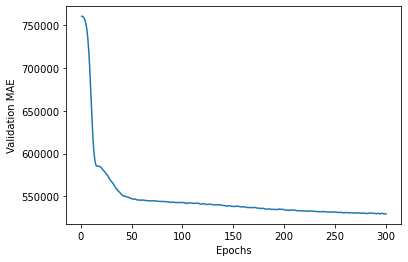

In [20]:
plt.plot(range(1, len(average_mae_val_history) + 1), average_mae_val_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

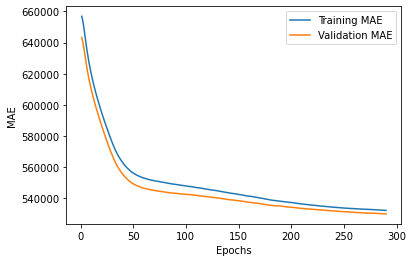

In [21]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history, label = 'Training MAE')
plt.xlabel('Epochs')
smooth_mae_val_history = smooth_curve(average_mae_val_history[10:])
plt.plot(range(1, len(smooth_mae_val_history) + 1), smooth_mae_val_history, label = 'Validation MAE')
plt.ylabel('MAE')
plt.legend()
plt.show()

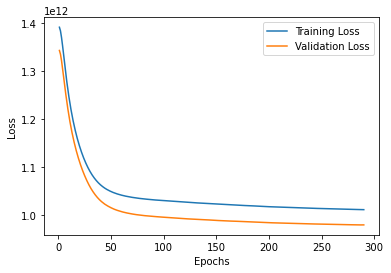

In [22]:
smooth_loss_history = smooth_curve(average_loss_history[10:])
plt.plot(range(1, len(smooth_loss_history) + 1), smooth_loss_history, label = 'Training Loss')
smooth_loss_val_history = smooth_curve(average_loss_val_history[10:])
plt.plot(range(1, len(smooth_loss_val_history) + 1), smooth_loss_val_history, label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [26]:
#num_epoches = 300
model = build_model()
history = model.fit(train_data, train_targets,epochs=num_epochs, batch_size=32)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

Epoch 1/300
181/181 [==============================] - 1s 4ms/step - loss: 1785037062864.1758 - mae: 762914.3705
Epoch 2/300
181/181 [==============================] - 1s 4ms/step - loss: 1785248184567.5605 - mae: 770134.6837
Epoch 3/300
181/181 [==============================] - 1s 4ms/step - loss: 1556922402928.5276 - mae: 752232.9739
Epoch 4/300
181/181 [==============================] - 1s 4ms/step - loss: 1599213670264.9670 - mae: 755672.1957
Epoch 5/300
181/181 [==============================] - 1s 4ms/step - loss: 1734336406134.1538 - mae: 775729.1181
Epoch 6/300
181/181 [==============================] - 1s 4ms/step - loss: 1679171299170.4614 - mae: 773079.7184
Epoch 7/300
181/181 [==============================] - 1s 4ms/step - loss: 1465566716174.0659 - mae: 743434.8537
Epoch 8/300
181/181 [==============================] - 1s 4ms/step - loss: 1549320573693.1868 - mae: 752589.7431
Epoch 9/300
181/181 [==============================] - 1s 4ms/step - loss: 1700108251090.9890 - 

181/181 [==============================] - 1s 4ms/step - loss: 656257382467.5165 - mae: 448177.0778
Epoch 74/300
181/181 [==============================] - 1s 4ms/step - loss: 616652496625.9341 - mae: 440826.2812
Epoch 75/300
181/181 [==============================] - 1s 4ms/step - loss: 699626716103.7362 - mae: 441479.7986
Epoch 76/300
181/181 [==============================] - 1s 4ms/step - loss: 591784921920.7032 - mae: 437696.4885
Epoch 77/300
181/181 [==============================] - 1s 4ms/step - loss: 768529146666.1978 - mae: 450141.0464
Epoch 78/300
181/181 [==============================] - 1s 4ms/step - loss: 689095511388.8352 - mae: 443550.2382
Epoch 79/300
181/181 [==============================] - 1s 4ms/step - loss: 592163460197.2748 - mae: 432826.3159
Epoch 80/300
181/181 [==============================] - 1s 4ms/step - loss: 679498322595.1648 - mae: 455078.7986
Epoch 81/300
181/181 [==============================] - 1s 4ms/step - loss: 643996827873.0549 - mae: 432863.1

181/181 [==============================] - 1s 4ms/step - loss: 673376659478.5055 - mae: 435839.1779
Epoch 146/300
181/181 [==============================] - 1s 4ms/step - loss: 675968008011.9561 - mae: 441507.1382
Epoch 147/300
181/181 [==============================] - 1s 4ms/step - loss: 690016170659.1648 - mae: 442700.9193
Epoch 148/300
181/181 [==============================] - 1s 4ms/step - loss: 693737800580.2197 - mae: 434470.5519
Epoch 149/300
181/181 [==============================] - 1s 4ms/step - loss: 653899319768.6154 - mae: 441014.7845
Epoch 150/300
181/181 [==============================] - 1s 4ms/step - loss: 572051447988.0439 - mae: 422632.2033
Epoch 151/300
181/181 [==============================] - 1s 4ms/step - loss: 650644619444.0439 - mae: 431687.1854
Epoch 152/300
181/181 [==============================] - 1s 4ms/step - loss: 684770107482.0220 - mae: 432032.4820
Epoch 153/300
181/181 [==============================] - 1s 4ms/step - loss: 686202768552.7913 - mae: 

Epoch 217/300
181/181 [==============================] - 1s 4ms/step - loss: 661995610021.9780 - mae: 424944.5738
Epoch 218/300
181/181 [==============================] - 1s 4ms/step - loss: 675301731046.6813 - mae: 426972.2904
Epoch 219/300
181/181 [==============================] - 1s 4ms/step - loss: 662204829921.0549 - mae: 424680.4480
Epoch 220/300
181/181 [==============================] - 1s 4ms/step - loss: 634400169263.8242 - mae: 421709.6959
Epoch 221/300
181/181 [==============================] - 1s 4ms/step - loss: 625601851166.9451 - mae: 431593.0208
Epoch 222/300
181/181 [==============================] - 1s 4ms/step - loss: 658541526499.8682 - mae: 424486.2191
Epoch 223/300
181/181 [==============================] - 1s 4ms/step - loss: 699692267497.4945 - mae: 440161.1607
Epoch 224/300
181/181 [==============================] - 1s 4ms/step - loss: 655508575963.4286 - mae: 422937.1367
Epoch 225/300
181/181 [==============================] - 1s 4ms/step - loss: 71816716143

181/181 [==============================] - 1s 4ms/step - loss: 865584635093.8022 - mae: 444419.3796
Epoch 289/300
181/181 [==============================] - 1s 4ms/step - loss: 648671109210.0220 - mae: 424978.0840
Epoch 290/300
181/181 [==============================] - 1s 4ms/step - loss: 601090929675.2528 - mae: 409554.9837
Epoch 291/300
181/181 [==============================] - 1s 4ms/step - loss: 683193890883.5165 - mae: 433382.9730
Epoch 292/300
181/181 [==============================] - 1s 4ms/step - loss: 705641968111.1208 - mae: 423734.1085
Epoch 293/300
181/181 [==============================] - 1s 4ms/step - loss: 767223446291.6923 - mae: 438610.1054
Epoch 294/300
181/181 [==============================] - 1s 4ms/step - loss: 769959223566.0659 - mae: 442299.0852
Epoch 295/300
181/181 [==============================] - 1s 4ms/step - loss: 640829883268.2197 - mae: 432569.2553
Epoch 296/300
181/181 [==============================] - 1s 4ms/step - loss: 558225005781.8022 - mae: 

In [27]:
test_mae_score

418714.53125